<a href="https://colab.research.google.com/github/iMan0405/Portfolio_DT_vs_AI/blob/main/a_model_that_detects_dead_and_green_leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from ipywidgets import widgets

In [2]:
path = Path('/content/drive/MyDrive/dry and green leaf dataset')
path.ls()
fls = get_image_files(path)
fls

(#1849) [Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images12.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images254.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images50.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images94.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images157.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/dry-leaves-vector-584754.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/image30.jpeg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images154.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images189.jpg'),Path('/content/drive/MyDrive/dry and green leaf dataset/dry leaf/images29.jpg')...]

In [3]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

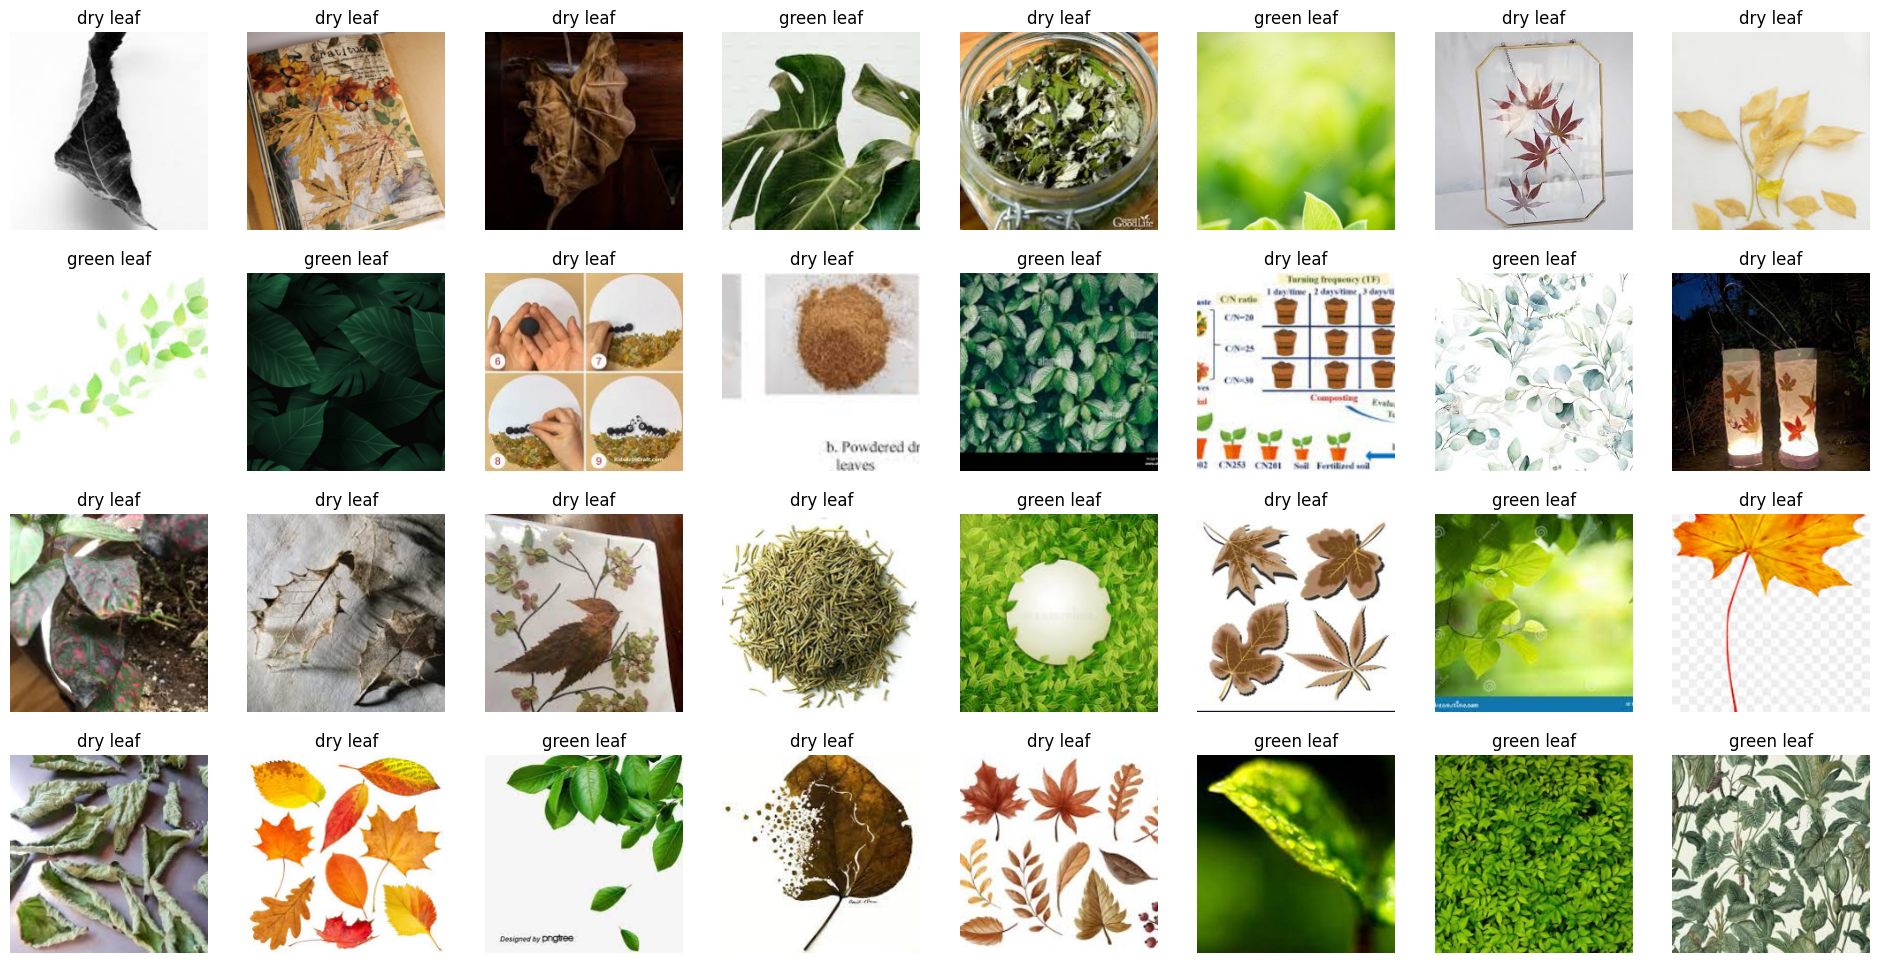

In [4]:
#DataBlock yaratamiz
person_nature = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#Dataloader yaratamiz
dls = person_nature.dataloaders(path)

#Datasetni tekshiramiz

dls.train.show_batch(max_n=32, nrows=4)

In [5]:
#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 92.6MB/s]


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


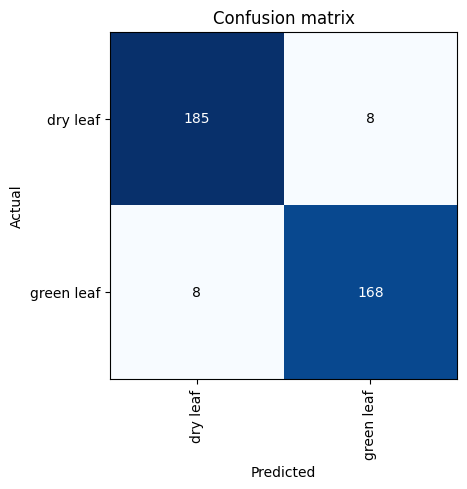

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

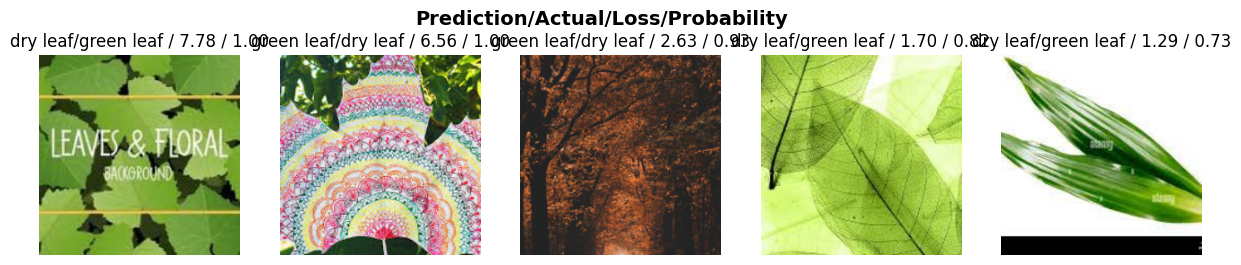

In [7]:
interp.plot_top_losses(5, nrows=1)

In [10]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

bashorat: Yashil barg
 Ushbu o'simlikning holati yaxshi )).
aniqlilik darajasi: 100.0%


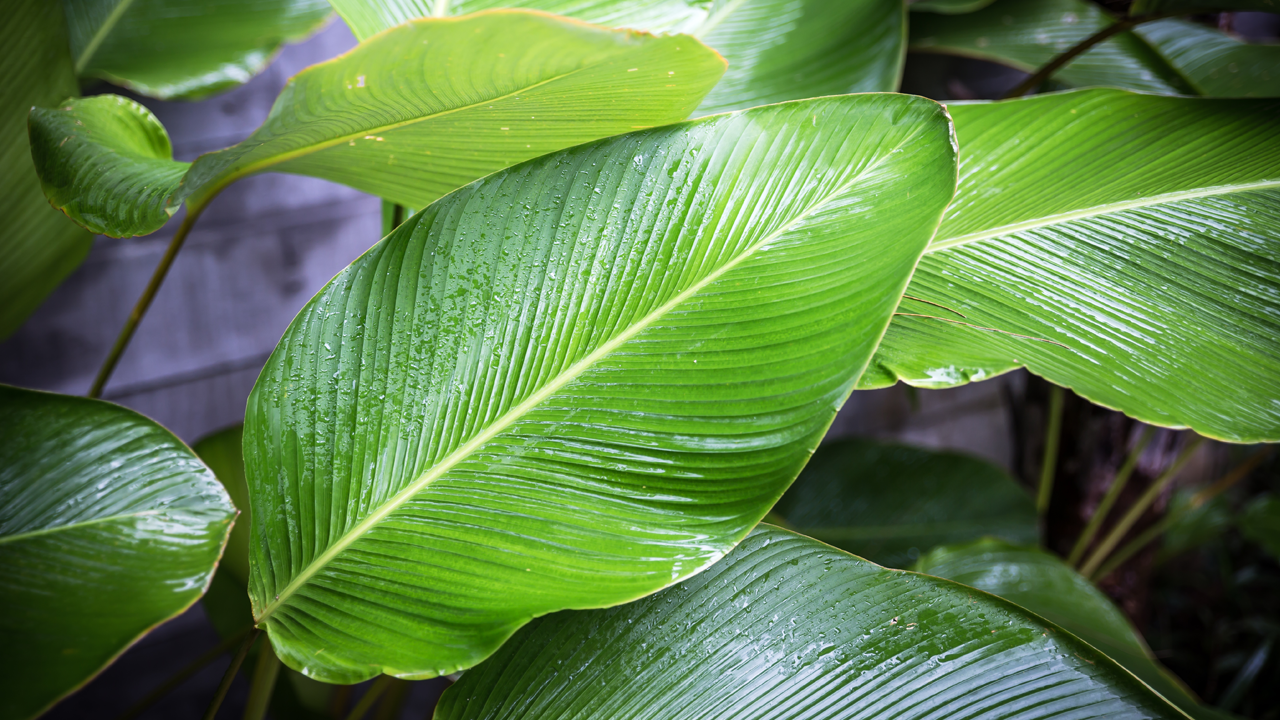

In [11]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
if pred == 'dry leaf':
  print(f"bashorat: Qurigan barg\n Ushbu o'simlikka suv qo'yishingiz lozim.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'green leaf':
  print(f"bashorat: Yashil barg\n Ushbu o'simlikning holati yaxshi )).")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
else:
  print('No Data')
img

In [12]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

bashorat: Qurigan barg
 Ushbu o'simlikka suv qo'yishingiz lozim.
aniqlilik darajasi: 100.0%


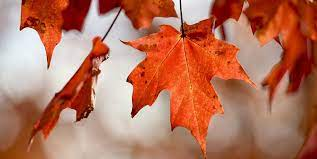

In [13]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
if pred == 'dry leaf':
  print(f"bashorat: Qurigan barg\n Ushbu o'simlikka suv qo'yishingiz lozim.")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
elif pred == 'green leaf':
  print(f"bashorat: Yashil barg\n Ushbu o'simlikning holati yaxshi )).")
  print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
else:
  print('No Data')
img

In [15]:
import pickle

filename = 'gulim.pkl'
with open(filename, 'wb') as file:
    pickle.dump(learn, file)